* TODO mean intensity plot remove cluster all
* TODO check mean intensity plot same as R plots? Same p-values? (might need to adapt python mixed model)
* TODO rerun SBF2 feature plots

# Extract intensity and spatial features from ICLs

Extract features for all experiments with
```
scripts/extract_features.sh
```

This extracts per cluster mean intensity features and per cluster pair co-occurence scores.
Co-occurrence scores are extracted with logarithmically growing distances, with 20 / 28 intervals, up to the maximum distance of 80 / 320 pixels, for `VAE_all` and `VAE_SBF2`, respectively.

The features are saved in an anndata object per data directory.

To extract a csv of mean intensity and size features and other metadata columns, execute the following code:

In [1]:
from miann.tl import Experiment, FeatureExtractor
import os

exp = Experiment.from_dir('VAE_all/CondVAE_pert-CC')
for data_dir in exp.data_params['data_dirs']:
    # clusters
    extr = FeatureExtractor.from_adata(os.path.join(exp.full_path, 'aggregated/full_data', data_dir, 'features.h5ad'))
    extr.extract_intensity_csv(obs=['well_name', 'perturbation_duration', 'TR'])

    # annotated clusters
    extr = FeatureExtractor.from_adata(os.path.join(exp.full_path, 'aggregated/full_data', data_dir, 'features_annotation.h5ad'))
    extr.extract_intensity_csv(obs=['well_name', 'perturbation_duration', 'TR'])

In [2]:
from miann.tl import Experiment, FeatureExtractor
import os

# SBF2 data
exp = Experiment.from_dir('VAE_SBF2/CondVAE_siRNA-CC')
for data_dir in exp.data_params['data_dirs']:
    # clusters
    extr = FeatureExtractor.from_adata(os.path.join(exp.full_path, 'aggregated/full_data', data_dir, 'features_seed1.h5ad'))
    extr.extract_intensity_csv(obs=['well_name', 'siRNA', 'TR', 'cell_cycle'])

    extr = FeatureExtractor.from_adata(os.path.join(exp.full_path, 'aggregated/full_data', data_dir, 'features_seed2.h5ad'))
    extr.extract_intensity_csv(obs=['well_name', 'siRNA', 'TR', 'cell_cycle'])

    extr = FeatureExtractor.from_adata(os.path.join(exp.full_path, 'aggregated/full_data', data_dir, 'features_seed3.h5ad'))
    extr.extract_intensity_csv(obs=['well_name', 'siRNA', 'TR', 'cell_cycle'])

    # annotated clusters
    #extr = FeatureExtractor.from_adata(os.path.join(exp.full_path, 'aggregated/full_data', data_dir, 'features_annotation.h5ad'))
    #extr.extract_intensity_csv(obs=['well_name', 'perturbation_duration', 'TR'])


# Explore features

In [1]:
from miann.tl import Experiment, FeatureExtractor
import os
from miann.pl import plot_mean_intensity, zscore, get_intensity_change, plot_intensity_change, plot_mean_size, plot_size_change
from miann.pl import plot_co_occurrence, plot_co_occurrence_grid
import anndata as ad
from miann.utils import init_logging
import logging
init_logging(level=logging.WARNING)

## VAE_all/CondVAE_pert-CC

In [2]:
exp = Experiment.from_dir('VAE_all/CondVAE_pert-CC')

### clustering_res0.5

In [3]:
# load extracted features for clustering_res0.9_sub-0.33_seed1
extrs = [FeatureExtractor.from_adata(os.path.join(exp.full_path, 'aggregated/full_data', data_dir, 'features.h5ad')) for data_dir in exp.data_params['data_dirs']]

# get combined adata for dotplots
adatas = [extr.get_intensity_adata() for extr in extrs]
adata = ad.concat(adatas, index_unique='-')

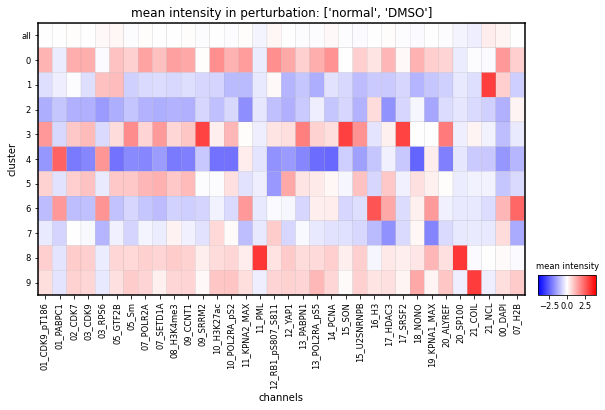

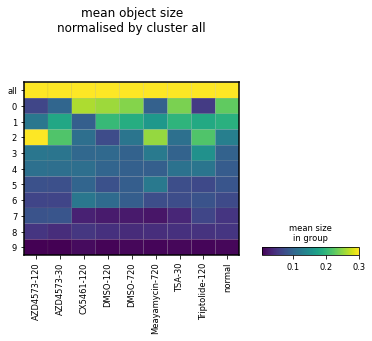

In [4]:
plot_mean_intensity(adata, groupby='cluster', limit_to_groups={'perturbation':['normal', 'DMSO']}, dendrogram=False, layer=None, 
    standard_scale='var', cmap='bwr', vmin=-4, vmax=4)
plot_mean_size(adata, groupby_row='cluster', groupby_col='perturbation_duration', normby_row='all', vmax=0.3)

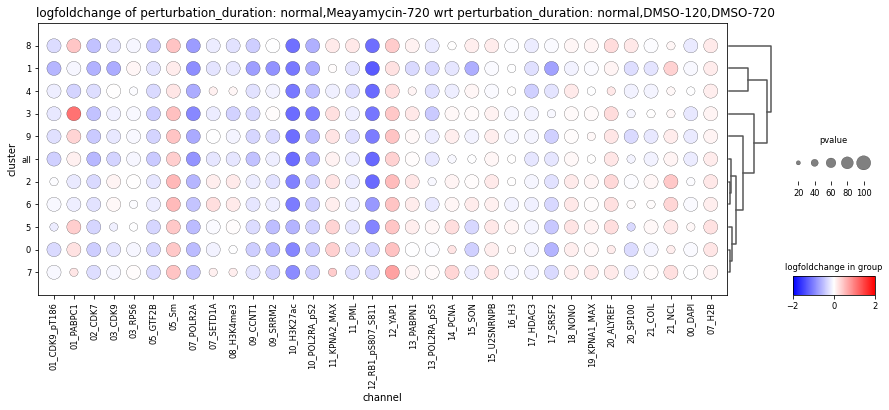

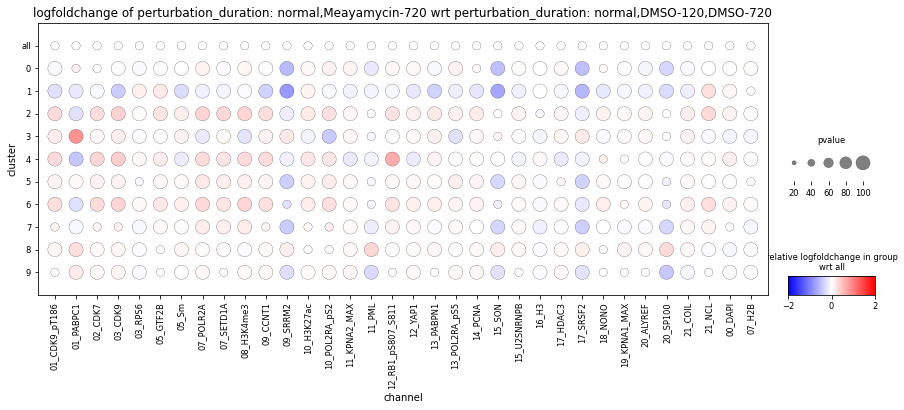

In [11]:
res = get_intensity_change(adata, groupby='cluster', reference_group='perturbation_duration', reference=['normal','DMSO-120', 'DMSO-720'], 
    limit_to_groups={'perturbation_duration': ['normal', 'Meayamycin-720']}, color='logfoldchange', size='pval')
plot_intensity_change(**res, adjust_height=True, figsize=(15,5), vmin=-2, vmax=2, dendrogram=True)

res = get_intensity_change(adata, groupby='cluster', reference_group='perturbation_duration', reference=['normal','DMSO-120', 'DMSO-720'], 
    limit_to_groups={'perturbation_duration': ['normal', 'Meayamycin-720']}, color='logfoldchange', size='pval', norm_by_group='all')
plot_intensity_change(**res, adjust_height=True, figsize=(15,5), vmin=-2, vmax=2)

### clustering_res0.5 annotation

In [12]:
# load extracted features for clustering_res0.9_sub-0.33_seed1
extrs = [FeatureExtractor.from_adata(os.path.join(exp.full_path, 'aggregated/full_data', data_dir, 'features_annotation.h5ad')) for data_dir in exp.data_params['data_dirs']]

# get combined adata for dotplots
adatas = [extr.get_intensity_adata() for extr in extrs]
adata = ad.concat(adatas, index_unique='-')

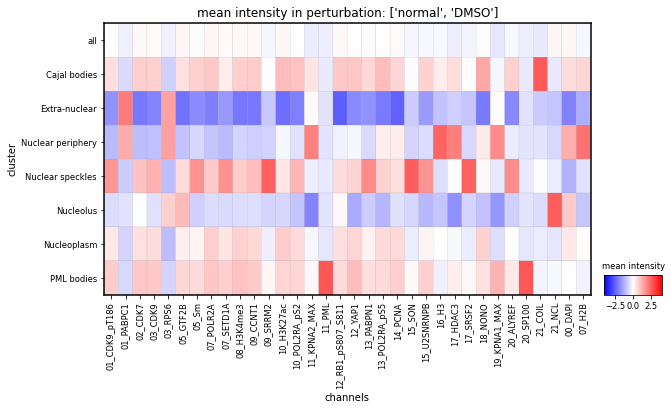

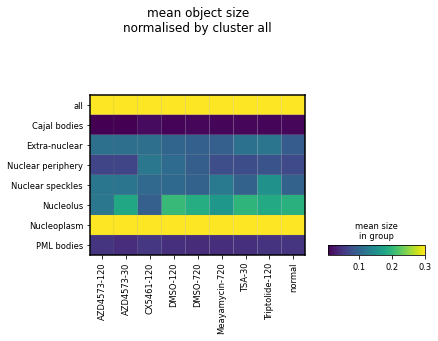

In [13]:
plot_mean_intensity(adata, groupby='cluster', limit_to_groups={'perturbation':['normal', 'DMSO']}, dendrogram=False, layer=None, 
    standard_scale='var', cmap='bwr', vmin=-4, vmax=4)
plot_mean_size(adata, groupby_row='cluster', groupby_col='perturbation_duration', normby_row='all', vmax=0.3)

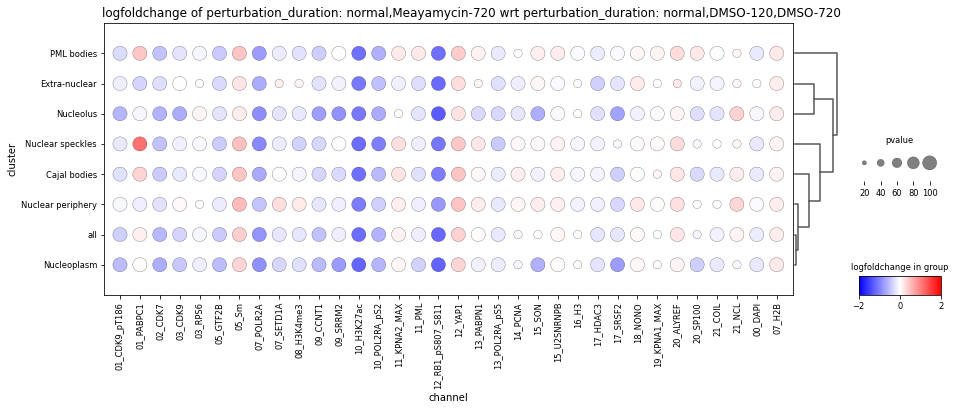

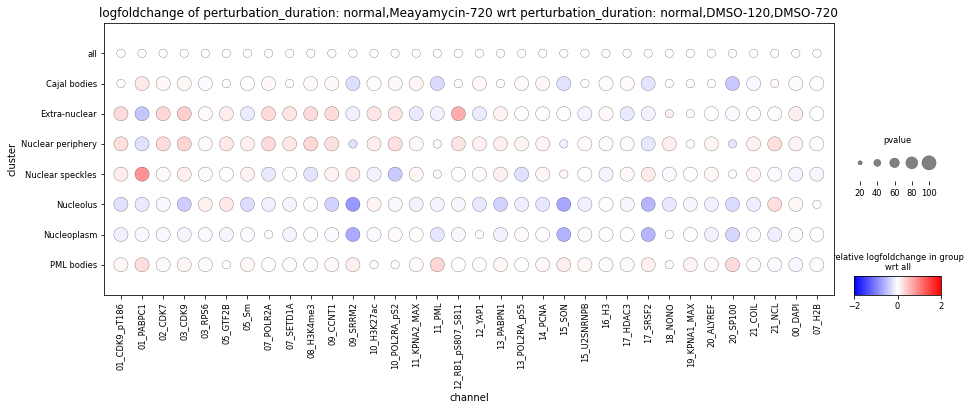

In [14]:
res = get_intensity_change(adata, groupby='cluster', reference_group='perturbation_duration', reference=['normal','DMSO-120', 'DMSO-720'], 
    limit_to_groups={'perturbation_duration': ['normal', 'Meayamycin-720']}, color='logfoldchange', size='pval')
plot_intensity_change(**res, adjust_height=True, figsize=(15,5), vmin=-2, vmax=2, dendrogram=True)

res = get_intensity_change(adata, groupby='cluster', reference_group='perturbation_duration', reference=['normal','DMSO-120', 'DMSO-720'], 
    limit_to_groups={'perturbation_duration': ['normal', 'Meayamycin-720']}, color='logfoldchange', size='pval', norm_by_group='all')
plot_intensity_change(**res, adjust_height=True, figsize=(15,5), vmin=-2, vmax=2)

In [5]:
# get combined adata for co-occurrence
adata_co_occ = ad.concat([extr.adata for extr in extrs], index_unique='-', uns_merge='same')

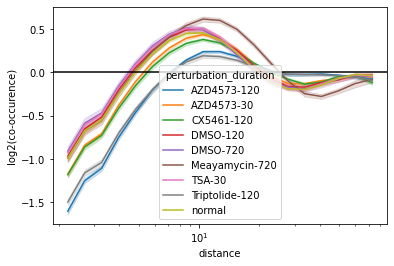

In [16]:
# for one cluster-cluster pairing
plot_co_occurrence(adata_co_occ, 'Nuclear speckles', 'PML bodies', 'perturbation_duration', condition_values=None)

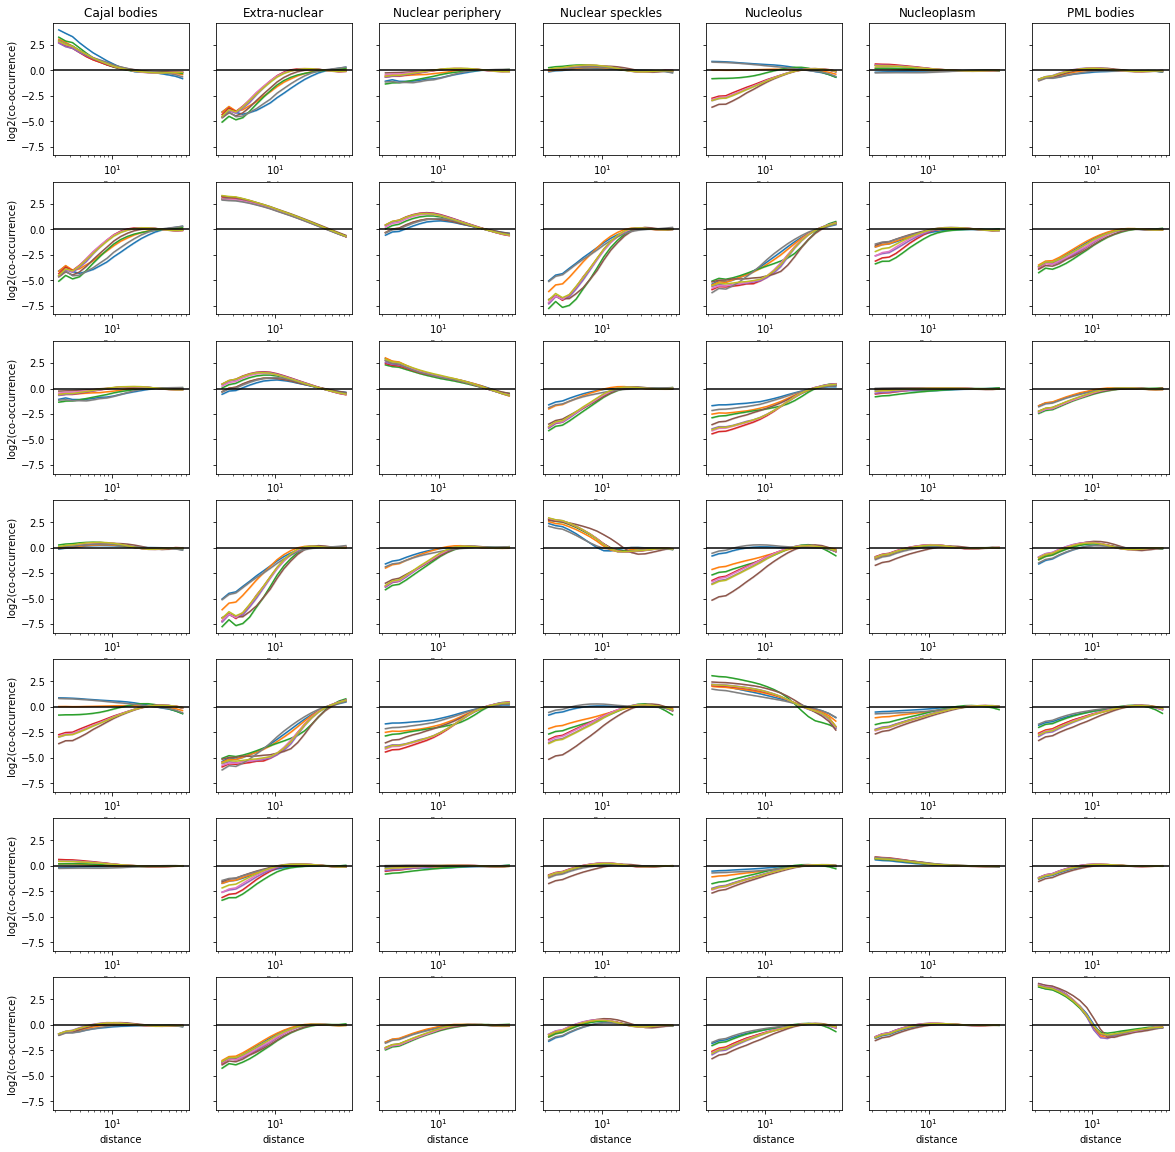

In [17]:
# for all cluster pairings
fig, axes = plot_co_occurrence_grid(adata_co_occ, 'perturbation_duration', condition_values=None, legend=False, ci=False, figsize=(20,20))

## VAE_SBF2/CondVAE_siRNA-CC

In [2]:
exp = Experiment.from_dir('VAE_SBF2/CondVAE_siRNA-CC')

### clustering_res0.9_sub-0.33_seed3 annotation

In [30]:
# TODO actually use seed3! (currently recomputing)

In [24]:
# load extracted features for clustering_res0.9_sub-0.33_seed1
extrs = [FeatureExtractor.from_adata(os.path.join(exp.full_path, 'aggregated/full_data', data_dir, 'features_seed1_annotation.h5ad')) for data_dir in exp.data_params['data_dirs']]

# get combined adata for dotplots
adatas = [extr.get_intensity_adata() for extr in extrs]
adata = ad.concat(adatas, index_unique='-')

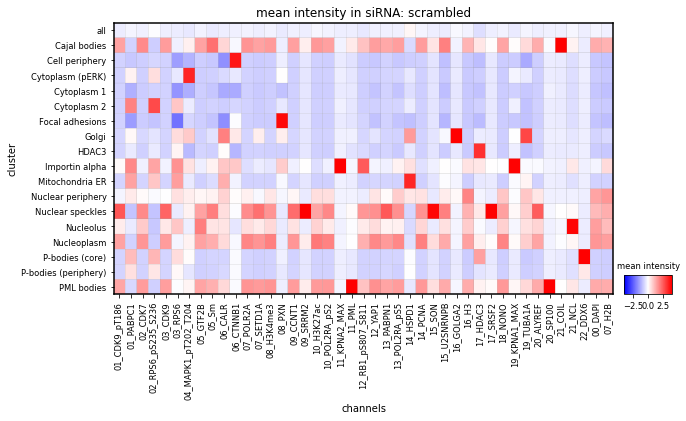

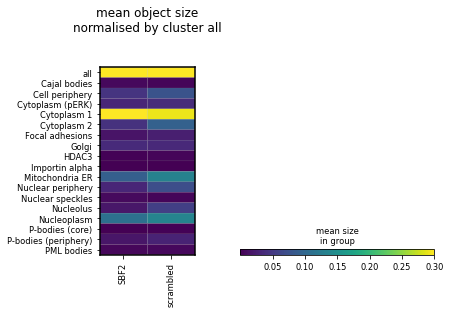

In [25]:
plot_mean_intensity(adata, groupby='cluster', limit_to_groups={'siRNA':'scrambled'}, dendrogram=False, layer=None,
    standard_scale='var', cmap='bwr', vmax=4, vmin=-4)
plot_mean_size(adata, groupby_row='cluster', groupby_col='siRNA', normby_row='all', vmax=0.3)

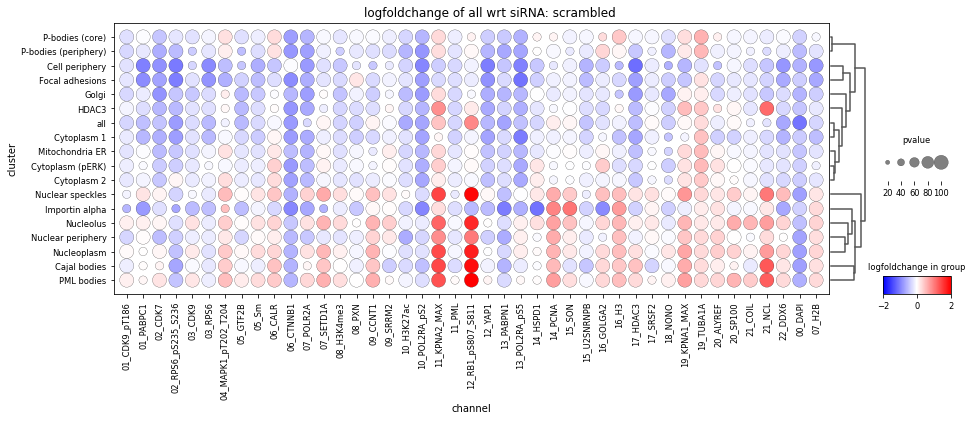

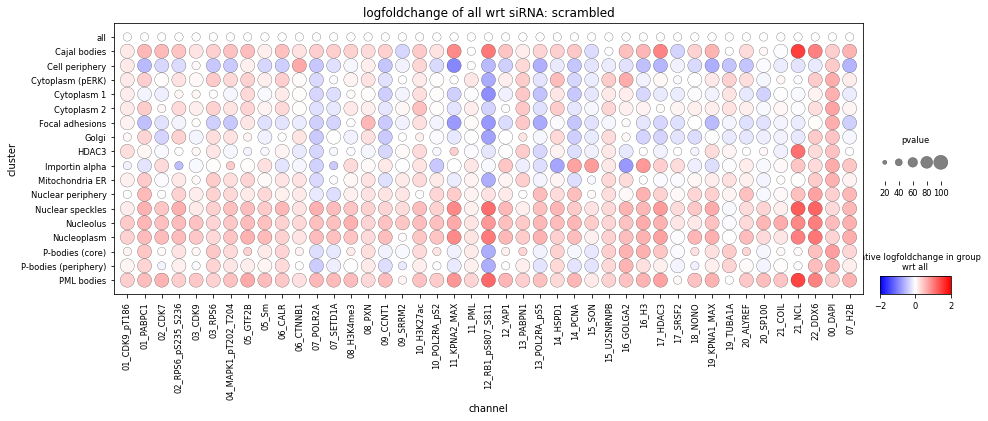

In [26]:
res = get_intensity_change(adata, groupby='cluster', reference_group='siRNA', reference='scrambled', color='logfoldchange', size='pval')
plot_intensity_change(**res, adjust_height=True, figsize=(15,5), vmin=-2, vmax=2, dendrogram=True)

res = get_intensity_change(adata, groupby='cluster', reference_group='siRNA', reference='scrambled', color='logfoldchange', size='pval', norm_by_group='all')
plot_intensity_change(**res, adjust_height=True, figsize=(15,5), vmin=-2, vmax=2)